In [1268]:
import pyxdf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
import os

In [1269]:
channels = ['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7'
            , 'P9', 'O1', 'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz'
            , 'FC2', 'FC6', 'F10', 'F8', 'F4', 'Fp2', 'ACC_X', 'ACC_Y', 'ACC_Z']
removed_channels = ['Fp1', 'F8', 'F7', 'Fp2', 'F3', 'F4']
# TODO ADD AUX WHEN CONNECTED
columns = channels
frequencies_main = ['8.18', '9', '10', '11.25', '12.85', '15']
frequencies = ['8.18_sin_h1','8.18_cos_h1','8.18_sin_h2','8.18_cos_h2','8.18_sin_h3','8.18_cos_h3',
               '9_sin_h1', '9_cos_h1','9_sin_h2', '9_cos_h2','9_sin_h3', '9_cos_h3',
               '10_sin_h1','10_cos_h1','10_sin_h2','10_cos_h2','10_sin_h3','10_cos_h3',
               '11.25_sin_h1','11.25_cos_h1','11.25_sin_h2','11.25_cos_h2','11.25_sin_h3','11.25_cos_h3',
               '12.85_sin_h1','12.85_cos_h1','12.85_sin_h2','12.85_cos_h2','12.85_sin_h3','12.85_cos_h3',
               '15_sin_h1', '15_cos_h1', '15_sin_h2', '15_cos_h2', '15_sin_h3', '15_cos_h3'
               ]



In [1270]:

def plot_single(df,df_ts, column):
    axis = plt.subplot()
    axis.plot(df_ts['time'], df[column])
    axis.set_title(column)
    plt.show()

def plot_eeg(df, df_ts):
    df.columns = columns
    index = 0
    for i in range(32):
        color = 'blue'
        index += 1
        if channels[i] in removed_channels:
            color = 'red'

        axis = plt.subplot()
        axis.plot(df_ts['time'], df[channels[i]], color=color)
        axis.set_title(channels[i])
        plt.show()





In [1271]:
def load_frequencies(path = '../data/ERPSpellerDataV1/ERPSpellerDataA30Sec8-18hz'):
    data, header = pyxdf.load_xdf(path+'/dejittered-unity-frequencies-Yformat.xdf')
    df_stream = None
    df_stream_ts = None
    for s in data:
        stream = s
        y = stream['time_series']
        df_stream = pd.DataFrame(y)
        df_stream_ts = pd.DataFrame(stream['time_stamps'])
        df_stream_ts.columns = ['time']
        df_stream.columns = frequencies
    return df_stream, df_stream_ts

def load_eeg(path = '../data/ERPSpellerDataV1/ERPSpellerDataA30Sec8-18hz'):
    data, header = pyxdf.load_xdf(path+'/dejittered-eeg.xdf')
    df_stream = None
    df_stream_ts = None
    for s in data:
        stream = s
        y = stream['time_series']
        df_stream = pd.DataFrame(y)
        df_stream_ts = pd.DataFrame(stream['time_stamps'])
        df_stream_ts.columns = ['time']
        df_stream.columns = channels
    return df_stream, df_stream_ts

def load_eeg_iir(path = '../data/ERPSpellerDataV1/ERPSpellerDataA30Sec8-18hz'):
    data, header = pyxdf.load_xdf(path+'/dejittered-iir-3order-7to110-eeg.xdf')
    df_stream = None
    df_stream_ts = None
    for s in data:
        stream = s
        y = stream['time_series']
        df_stream = pd.DataFrame(y)
        df_stream_ts = pd.DataFrame(stream['time_stamps'])
        df_stream_ts.columns = ['time']
        df_stream.columns = channels
    return df_stream, df_stream_ts

def load_eeg_and_freq(path = '../data/ERPSpellerDataV1/ERPSpellerDataA30Sec8-18hz'):
    data, header = pyxdf.load_xdf(path+'/dejittered-shifted43ms-decimate2-eeg-and-dejittered-unity-freq.xdf')
    df_stream = None
    df_stream_ts = None
    for s in data:
        stream = s
        y = stream['time_series']
        df_stream = pd.DataFrame(y)
        df_stream_ts = pd.DataFrame(stream['time_stamps'])
        df_stream_ts.columns = ['time']
        df_stream.columns = frequencies+ channels
    return df_stream, df_stream_ts

In [1272]:
def find_letters(list):
    start_found = False
    start = 0
    for i,v in enumerate(list):
        if v != 0 and not start_found:
            start = i
        if i != 0 and (i+1) != len(list) and v == 0 and list[i-1] == 0 and list[i+1] == 0 and start_found :
            return start, i

    return start, len(list)

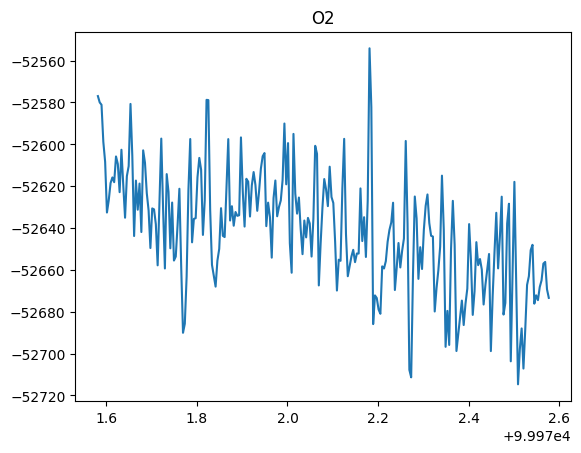

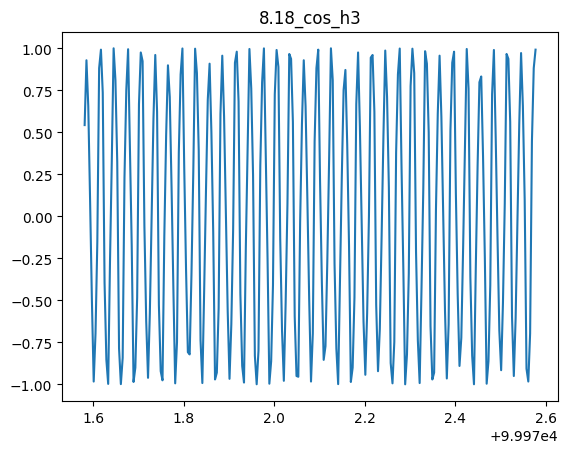

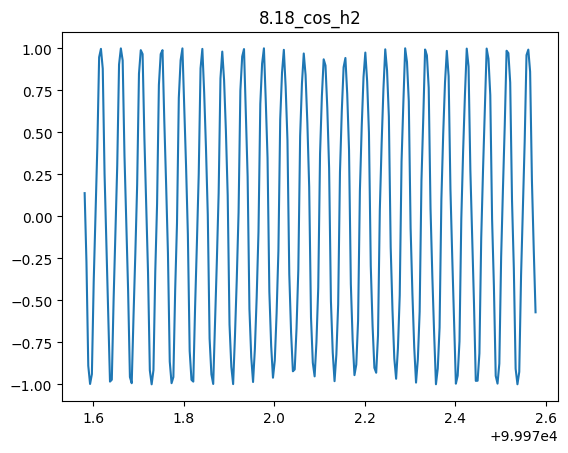

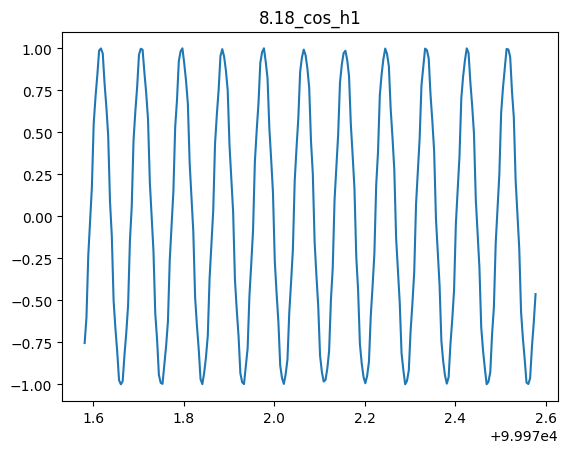

8.18_sin_h1
[[1.         0.32159915]
 [0.32159915 1.        ]]
8.18_cos_h1
[[1.        0.2180836]
 [0.2180836 1.       ]]
8.18_sin_h2
[[1.         0.13337591]
 [0.13337591 1.        ]]
8.18_cos_h2
[[1.         0.26433918]
 [0.26433918 1.        ]]
8.18_sin_h3
[[1.         0.13893656]
 [0.13893656 1.        ]]
8.18_cos_h3
[[1.         0.21882174]
 [0.21882174 1.        ]]
9_sin_h1
[[1.         0.31802948]
 [0.31802948 1.        ]]
9_cos_h1
[[1.         0.30745064]
 [0.30745064 1.        ]]
9_sin_h2
[[1.         0.23304177]
 [0.23304177 1.        ]]
9_cos_h2
[[1.         0.25373337]
 [0.25373337 1.        ]]
9_sin_h3
[[1.         0.13498846]
 [0.13498846 1.        ]]
9_cos_h3
[[1.         0.22270561]
 [0.22270561 1.        ]]
10_sin_h1
[[1.         0.36577337]
 [0.36577337 1.        ]]
10_cos_h1
[[1.        0.2865344]
 [0.2865344 1.       ]]
10_sin_h2
[[1.         0.26307525]
 [0.26307525 1.        ]]
10_cos_h2
[[1.         0.24160961]
 [0.24160961 1.        ]]
10_sin_h3
[[1.        0.14

In [1273]:
flip = False
path = '../data/BCISpellerV5/BCISpellerV515_1/'
df_eeg, df_ts_eeg = load_eeg(path)
df_eeg_iir, df_ts_eeg_iir = load_eeg_iir(path)
df_freq, df_ts_freq = load_frequencies(path)
df_eeg_freq, df_ts_eeg_freq = load_eeg_and_freq(path)
chosen_channel = 'O2'

start = 250*4
end = round(250*5)


if True:
    plot_single(df_eeg_freq[start:end], df_ts_eeg_freq[start:end], chosen_channel)
    plot_single(df_eeg_freq[start:end], df_ts_eeg_freq[start:end], '8.18_cos_h3')
    plot_single(df_eeg_freq[start:end], df_ts_eeg_freq[start:end], '8.18_cos_h2')
    plot_single(df_eeg_freq[start:end], df_ts_eeg_freq[start:end], '8.18_cos_h1')


X = df_eeg_iir[start:end][['O1','Oz','O2', 'P3', 'P4', 'Pz', 'P7', 'P8']]
for i in frequencies:
    Y = df_freq[round(start):round(end)][i]
    ca = CCA(n_components=1)
    ca.fit(X, Y)
    X_c, Y_c = ca.transform(X, Y)
    print(i)
    print(np.corrcoef(X_c[:, 0], Y_c[:, 0]))

In [1283]:
path = '../data/BCISpellerV5/'
paths = [name for name in os.listdir(path) if "" in name]
result = []
for name in paths:
    df_eeg, df_ts_eeg = load_eeg(path+name)
    df_eeg_iir, df_ts_eeg_iir = load_eeg_iir(path+name)
    df_freq, df_ts_freq = load_frequencies(path+name)
    df_eeg_freq, df_ts_eeg_freq = load_eeg_and_freq(path+name)
    chosen_channel = 'Oz'

    print(len(df_eeg_freq))
    start = 250*3
    end = round(250*5.25)

    X = df_eeg_freq[start:end][['O1','O2', 'P3','P4', 'Pz', 'P7', 'P8']]
    print(name)
    freqs = []
    t = 0
    for i in range(0,len(frequencies),6):
        t = t+1
        Y = df_eeg_freq[round(start):round(end)][frequencies[i:6*t]]
        print(Y.shape)
        ca = CCA(n_components=1)
        ca.fit(X, Y)
        X_c, Y_c = ca.transform(X, Y)
        print([np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(1)])
        freqs.append(np.corrcoef(X_c[:, 0], Y_c[:, 0])[0][1])

    result.append(freqs)

df = pd.DataFrame(result, columns=frequencies_main)
df = df.T
df['Mean'] = round(df.loc[:, 0:4].mean(axis=1),3)
display(df)

print(frequencies_main[np.argmax(df['Mean'])])

2197
BCISpellerV59_2
(562, 6)
[0.20457513084323184]
(562, 6)
[0.14198702867884286]
(562, 6)
[0.18244496506546962]
(562, 6)
[0.1311548477432072]
(562, 6)
[0.12824567209265295]
(562, 6)
[0.1368027356296846]
958
BCISpellerV512.85_2
(208, 6)
[0.2868765242352445]
(208, 6)
[0.30674905660258384]
(208, 6)
[0.3457474836953577]
(208, 6)
[0.322704043298912]
(208, 6)
[0.23534700398008399]
(208, 6)
[0.24449593503175404]
1452
BCISpellerV515_1
(562, 6)
[0.18887183182141074]
(562, 6)
[0.17818810017033918]
(562, 6)
[0.21123966611848763]
(562, 6)
[0.2038437129469472]
(562, 6)
[0.22766290302431758]
(562, 6)
[0.18494355233168686]
1219
BCISpellerV512.85_5
(469, 6)
[0.23060050125794354]
(469, 6)
[0.19423392801445147]
(469, 6)
[0.1889562999358705]
(469, 6)
[0.1869886450716102]
(469, 6)
[0.14199135795361972]
(469, 6)
[0.1943830631152781]
827
BCISpellerV58.18_5
(77, 6)
[0.6694412323548506]
(77, 6)
[0.7413199937224787]
(77, 6)
[0.630105685758355]
(77, 6)
[0.4182172980166056]
(77, 6)
[0.42237111844017705]
(77, 6

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Mean
8.18,0.204575,0.286877,0.188872,0.230601,0.669441,0.217660,0.257948,0.248720,0.197101,0.217818,...,0.179933,0.215325,0.224381,0.259615,0.202657,0.166915,0.182429,0.185955,0.264830,0.316
9,0.141987,0.306749,0.178188,0.194234,0.741320,0.197896,0.209954,0.181370,0.163401,0.180097,...,0.161359,0.189777,0.224885,0.176425,0.230958,0.164466,0.208965,0.180768,0.174422,0.312
10,0.182445,0.345747,0.211240,0.188956,0.630106,0.249964,0.178135,0.237561,0.178490,0.215384,...,0.212879,0.167307,0.153361,0.211011,0.170001,0.199089,0.204643,0.192650,0.187968,0.312
11.25,0.131155,0.322704,0.203844,0.186989,0.418217,0.255739,0.164217,0.188344,0.161609,0.201531,...,0.156623,0.180670,0.145694,0.188115,0.201646,0.129446,0.221272,0.152519,0.131636,0.253
12.85,0.128246,0.235347,0.227663,0.141991,0.422371,0.138848,0.110749,0.170494,0.167024,0.173828,...,0.182184,0.193619,0.132141,0.142839,0.136997,0.131328,0.208979,0.140819,0.156427,0.231
15,0.136803,0.244496,0.184944,0.194383,0.450092,0.120635,0.163157,0.160973,0.162964,0.196556,...,0.167053,0.177332,0.152316,0.150006,0.146901,0.137435,0.131590,0.166529,0.163463,0.242


8.18
